In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1)

In [9]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

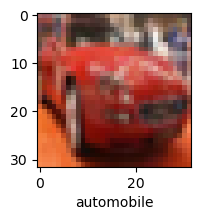

In [11]:
plot_sample(x_train, y_train, 5)

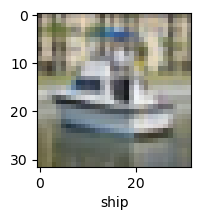

In [12]:
plot_sample(x_train, y_train, 501)

In [13]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [14]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
train__y_labels = label_as_binary.fit_transform(y_train)
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation= 'softmax')
])

ann.compile(optimizer = 'SGD',
           loss = 'categorical_crossentropy',
           metrics = ['accuracy'])
ann.fit(x_train,train__y_labels , epochs=5)

Epoch 1/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.8129 - accuracy: 0.3533
Epoch 2/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.6246 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 79s 51ms/step - loss: 1.5422 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 82s 53ms/step - loss: 1.4823 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.4302 - accuracy: 0.4942


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification report: \n", classification_report(y_test, y_pred_classes ))

classification report: 
               precision    recall  f1-score   support

           0       0.56      0.51      0.53      1000
           1       0.73      0.42      0.53      1000
           2       0.39      0.25      0.30      1000
           3       0.37      0.32      0.34      1000
           4       0.71      0.10      0.18      1000
           5       0.39      0.39      0.39      1000
           6       0.49      0.60      0.54      1000
           7       0.33      0.80      0.46      1000
           8       0.53      0.70      0.60      1000
           9       0.58      0.50      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.44     10000
weighted avg       0.51      0.46      0.44     10000



In [17]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

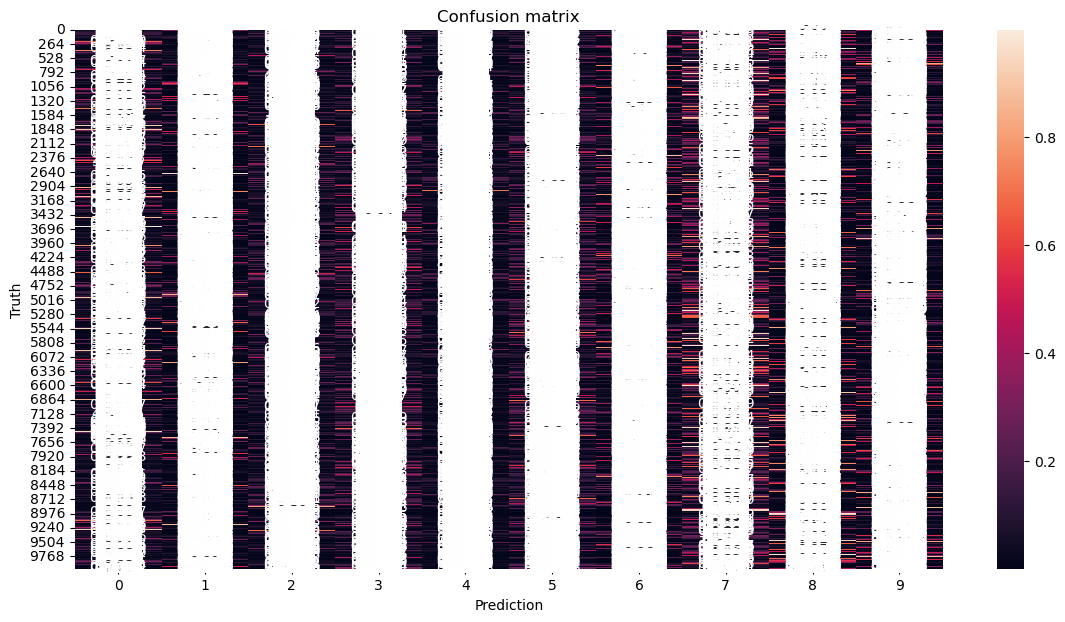

In [18]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation ='relu'),
    layers.Dense(10, activation ='softmax')
])

In [26]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
train__y_labels = label_as_binary.fit_transform(y_train)

cnn.compile(optimizer = 'adam',
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

cnn.fit(x_train, train__y_labels , epochs = 10)


Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4882 - accuracy: 0.4634
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1244 - accuracy: 0.6039
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9912 - accuracy: 0.6537
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9094 - accuracy: 0.6854
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8489 - accuracy: 0.7069
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7966 - accuracy: 0.7254
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7485 - accuracy: 0.7397
Epoch 8/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7076 - accuracy: 0.7539
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6707 - accuracy: 0.7665
Epoch 10/10
1563/1563 [==============================] - 26s 17m

In [28]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
test__y_labels = label_as_binary.fit_transform(y_test)

cnn.evaluate(x_test, test__y_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.9314 - accuracy: 0.6896


[0.9313715696334839, 0.6895999908447266]

In [30]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[9.23995176e-05, 1.20420016e-04, 1.14819920e-03, 9.19812977e-01,
        2.48186244e-03, 6.49978593e-02, 1.05168233e-02, 2.16975663e-04,
        3.82036902e-04, 2.30603604e-04],
       [5.10356622e-04, 6.96982024e-03, 6.91735409e-07, 4.15905379e-06,
        1.01547687e-06, 1.51486095e-08, 1.74215806e-08, 3.21651528e-09,
        9.92409706e-01, 1.04246421e-04],
       [7.09333271e-02, 2.20189825e-01, 1.60510594e-03, 1.54588185e-02,
        1.81371614e-03, 1.14919746e-03, 1.01986527e-03, 7.61143805e-04,
        6.62238300e-01, 2.48306971e-02],
       [7.75255859e-01, 1.50776864e-03, 1.10765249e-01, 3.98315024e-03,
        6.33698553e-02, 3.87441396e-05, 4.38780233e-04, 1.44996884e-04,
        4.44880314e-02, 7.52461710e-06],
       [4.92141226e-05, 4.01709221e-05, 2.23803855e-02, 7.05608577e-02,
        5.44809997e-01, 1.30268419e-02, 3.48939508e-01, 2.26910961e-05,
        1.65641002e-04, 4.78868151e-06]], dtype=float32)

In [31]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [32]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

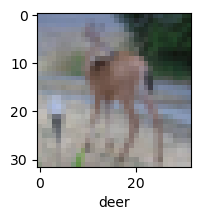

In [48]:
plot_sample(x_test, y_test, 100)

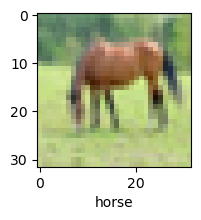

In [49]:
plot_sample(x_test, y_test, 60)

In [50]:
classes[y_classes[60]] 

'horse'